In [1]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file
import os
import numpy as np
import cv2



In [2]:
dicom_folder = "/home/shihab/Desktop/Machine Learning/Dataset/3dImageDataset/minData/147-Tahera Sultana. Dr_Nurul_Amin"


In [3]:
dicom_folder1 = "/home/shihab/Desktop/Machine Learning/Dataset/3dImageDataset/minData/207_Nahida Sultana. Dr_Emdad"

dicom_folder2 = "/home/shihab/Desktop/Machine Learning/Dataset/3dImageDataset/minData/208_Sabbir Ahmed"



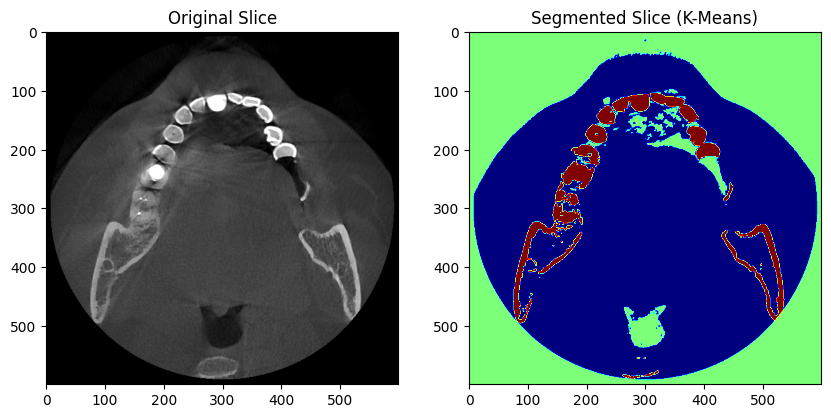

In [4]:
import os
import numpy as np
import pydicom
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import exposure

# Load DICOM data
import os
import pydicom
import numpy as np

def load_dicom_images(dicom_folder):
    dicom_files = [f for f in os.listdir(dicom_folder) if f.endswith('.dcm')]
    images = []
    for file in dicom_files:
        dicom_path = os.path.join(dicom_folder, file)
        dicom_data = pydicom.dcmread(dicom_path)
        images.append(dicom_data.pixel_array)
    return np.array(images)

# Normalize images for clustering
def normalize_images(images):
    normalized = exposure.rescale_intensity(images, out_range=(0, 1))
    return normalized

# K-Means Clustering
def segment_with_kmeans(image, n_clusters=3):
    flat_image = image.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(flat_image)
    segmented = kmeans.labels_.reshape(image.shape)
    return segmented

# Load and preprocess
images = load_dicom_images(dicom_folder)
normalized_images = normalize_images(images)

# Perform segmentation on a single slice
slice_idx = 50  # Adjust for visualization
segmented_slice = segment_with_kmeans(normalized_images[slice_idx])

# Visualize original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Slice")
plt.imshow(normalized_images[slice_idx], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Segmented Slice (K-Means)")
plt.imshow(segmented_slice, cmap="jet")
plt.show()


In [ ]:
# Load DICOM data
import os
import pydicom
import numpy as np

def load_dicom_images(dicom_folder1):
    dicom_files = [f for f in os.listdir(dicom_folder1) if f.endswith('.dcm')]
    images = []
    for file in dicom_files:
        dicom_path = os.path.join(dicom_folder1, file)
        dicom_data = pydicom.dcmread(dicom_path)
        images.append(dicom_data.pixel_array)
    return np.array(images)

images = load_dicom_images(dicom_folder1)


# Normalize images for clustering
def normalize_images(images):
    normalized = exposure.rescale_intensity(images, out_range=(0, 1))
    return normalized

# K-Means Clustering
def segment_with_kmeans(image, n_clusters=3):
    flat_image = image.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(flat_image)
    segmented = kmeans.labels_.reshape(image.shape)
    return segmented

# Load and preprocess
images = load_dicom_images(dicom_folder)
normalized_images = normalize_images(images)

# Perform segmentation on a single slice
slice_idx = 50  # Adjust for visualization
segmented_slice = segment_with_kmeans(normalized_images[slice_idx])

# Visualize original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Slice")
plt.imshow(normalized_images[slice_idx], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Segmented Slice (K-Means)")
plt.imshow(segmented_slice, cmap="jet")
plt.show()


NameError: name 'exposure' is not defined

In [14]:
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects

# Apply Otsu's thresholding
segmented_stack = []
for slice in smoothed_stack:
    threshold = threshold_otsu(slice)
    binary_mask = slice > threshold
    segmented_stack.append(binary_mask)

segmented_stack = np.array(segmented_stack)

# Remove small objects
cleaned_stack = np.array([remove_small_objects(mask, min_size=100) for mask in segmented_stack])


In [16]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import label

# Perform watershed segmentation
labels = []
for slice in smoothed_stack:
    distance = -gaussian_filter(slice, sigma=2)
    local_max = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=slice)
    markers, _ = label(local_max)
    segmented = watershed(distance, markers, mask=slice)
    labels.append(segmented)

labels = np.array(labels)


TypeError: peak_local_max() got an unexpected keyword argument 'indices'

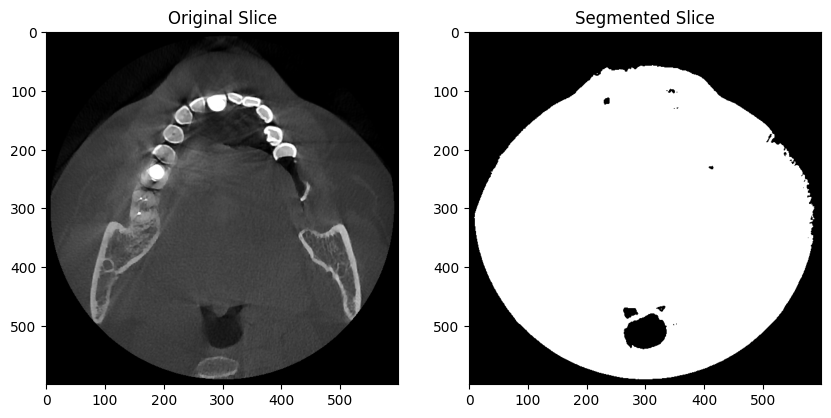

In [15]:
import matplotlib.pyplot as plt

# Visualize a single slice
slice_idx = 50  # Choose any slice index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Slice")
plt.imshow(image_stack[slice_idx], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Segmented Slice")
plt.imshow(segmented_stack[slice_idx], cmap="gray")
plt.show()



In [20]:
def normalize(volume):
    volume = volume - np.min(volume)
    volume = volume / np.max(volume)
    return volume


In [26]:
import SimpleITK as sitk

def resample_volume(volume, new_spacing=(1.0, 1.0, 1.0)):
    sitk_volume = sitk.GetImageFromArray(volume)
    original_spacing = sitk_volume.GetSpacing()
    original_size = sitk_volume.GetSize()
    new_size = [
        int(np.round(original_size[i] * (original_spacing[i] / new_spacing[i])))
        for i in range(3)
    ]
    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetSize(new_size)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampled_volume = resampler.Execute(sitk_volume)
    return sitk.GetArrayFromImage(resampled_volume)


In [27]:
def extract_slices(volume):
    return [volume[:, :, i] for i in range(volume.shape[2])]


In [29]:
!pip install numpy pydicom opencv-python scikit-image matplotlib SimpleITK nibabel tensorflow keras pytorch torchvision monai

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    # Add more layers similarly...
    up = UpSampling2D((2, 2))(p1)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(up)
    return Model(inputs, outputs)

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 57.4 kB/s eta 0:00:0000:0100:07
     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/615.3 MB 23.2 kB/s eta 4:46:54
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/lib/python3/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.1

ModuleNotFoundError: No module named 'tensorflow'